In [7]:
from google.colab import drive
drive.mount('/gdrive',force_remount=True)

Mounted at /gdrive


In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
import pandas as pd
train = pd.read_csv("/content/drive/MyDrive/girlscript/Breast%20Cancer%20Data.csv")
train.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [14]:
!pip install sweetviz

     |████████████████████████████████| 15.1MB 235kB/s 
     |████████████████████████████████| 81kB 7.4MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


# Visualization

In [15]:
len(train['id'].unique())

569

In [16]:
train.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,-0.052511,0.143048,-0.007526,0.137331,0.177742,0.096781,0.033961,0.055239,0.078768,-0.017306,0.025725,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,NaN
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,NaN
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,NaN
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,NaN
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,NaN
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,NaN
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,NaN
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,NaN
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,NaN
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,NaN


In [17]:
# using sweetviz
import sweetviz as sv
report=sv.analyze(train)
# Generating report
report.show_html('eda_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report eda_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [18]:
report.show_html(filepath='/content/eda_report.html',
                 open_browser=True,
                 layout='vertical',
                 scale=0.7)

Report /content/eda_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [19]:
'''Customize visualization
Seaborn and matplotlib visualization.'''
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
plt.style.use('bmh')                    
sns.set_style({'axes.grid':False}) 

'''Plotly visualization .'''
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected = True) # Required to use plotly offline in jupyter notebook

'''Display markdown formatted output like bold, italic bold etc.'''
from IPython.display import Markdown
def bold(string):
    display(Markdown(string))

In [20]:
'''Extract numerical variables first.'''
num_merged = train.select_dtypes(include = ['int64', 'float64'])
#bold('**Numerical variables:**')
display(num_merged.head(3))
#bold('**Name of numerical variables:**')
display(num_merged.columns.values)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


array(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se',
       'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst', 'Unnamed: 32'], dtype=object)

# Preprocessing

In [22]:
train['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [23]:
train["diagnosis"].replace(["B","M"],[0,1],inplace = True)

In [51]:
y = train['diagnosis']
X = train.drop(['id','diagnosis','Unnamed: 32'],axis=1)

In [52]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
X = rs.fit_transform(X)

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# Deep learning


In [55]:
# importing libraries and keras packages
from keras.models import Sequential
from keras.layers import Dense , Dropout,BatchNormalization
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score

# Initializing the ann
classifier = Sequential()

# adding layers to classifier
classifier.add(Dense(units = 32 , activation = 'relu',kernel_initializer='he_uniform' , input_dim = X.shape[1]))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.2))
classifier.add(Dense(units = 32 , activation= 'relu',kernel_initializer='he_uniform'))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.3))
classifier.add(Dense(units = 64 , activation= 'relu',kernel_initializer='he_uniform'))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.4))
classifier.add(Dense(units = 1 , activation='sigmoid'))

# compiling ann
opt = SGD(lr=0.001, momentum=0.9) 
classifier.compile(optimizer= opt , loss = 'binary_crossentropy' ,metrics = ['accuracy'])



# Fitting the dataset to ann classifier
classifier.fit(X_train , y_train,validation_data=(X_test,y_test), batch_size =32 ,epochs = 200)


Epoch 1/200
12/12 [==============================] - 1s 29ms/step - loss: 0.7968 - accuracy: 0.5672 - val_loss: 0.5849 - val_accuracy: 0.6702
Epoch 2/200
12/12 [==============================] - 0s 7ms/step - loss: 0.7103 - accuracy: 0.6096 - val_loss: 0.5209 - val_accuracy: 0.8404
Epoch 3/200
12/12 [==============================] - 0s 8ms/step - loss: 0.6984 - accuracy: 0.6196 - val_loss: 0.4609 - val_accuracy: 0.8777
Epoch 4/200
12/12 [==============================] - 0s 6ms/step - loss: 0.6274 - accuracy: 0.6889 - val_loss: 0.4129 - val_accuracy: 0.8936
Epoch 5/200
12/12 [==============================] - 0s 6ms/step - loss: 0.5145 - accuracy: 0.7628 - val_loss: 0.3771 - val_accuracy: 0.9043
Epoch 6/200
12/12 [==============================] - 0s 6ms/step - loss: 0.4090 - accuracy: 0.8054 - val_loss: 0.3452 - val_accuracy: 0.9202
Epoch 7/200
12/12 [==============================] - 0s 6ms/step - loss: 0.4255 - accuracy: 0.8132 - val_loss: 0.3176 - val_accuracy: 0.9415
Epoch 8/200


In [29]:
print(classification_report(y_test,classifier.predict_classes(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       123
           1       0.97      0.92      0.94        65

    accuracy                           0.96       188
   macro avg       0.96      0.95      0.96       188
weighted avg       0.96      0.96      0.96       188



# Classifiers

In [35]:
from time import time
from sklearn.metrics import classification_report,accuracy_score

Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
t = time()
logreg.fit(X_train,y_train)
accuracy = accuracy_score(y_test, logreg.predict(X_test)) 
print("The accuracy of testing data: ",accuracy)
print("The running time: ",time()-t)
print('\n')
print('Classification Report :-')
print(classification_report(y_test,logreg.predict(X_test)))

The accuracy of testing data:  0.973404255319149
The running time:  0.01474905014038086


Classification Report :-
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       123
           1       0.97      0.95      0.96        65

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188



SVM

In [41]:
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf')
t = time()
svm.fit(X_train,y_train)
accuracy = accuracy_score(y_test, svm.predict(X_test)) 
print("The accuracy of testing data: ",accuracy)
print("The running time: ",time()-t)
print('\n')
print('Classification Report :-')
print(classification_report(y_test,svm.predict(X_test)))

The accuracy of testing data:  0.9627659574468085
The running time:  0.012106180191040039


Classification Report :-
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       123
           1       0.95      0.94      0.95        65

    accuracy                           0.96       188
   macro avg       0.96      0.96      0.96       188
weighted avg       0.96      0.96      0.96       188



XGB

In [32]:
import xgboost as xgb
# read in data
dtrain = xgb.DMatrix(X_train,y_train)
dtest = xgb.DMatrix(X_test,y_test)
evallist = [(dtest, 'eval'), (dtrain, 'train')]
# specify parameters via map
param = {'booster': 'dart',
         'max_depth': 7, 'learning_rate': 0.01,
         'objective': 'binary:logistic',
         'sample_type': 'uniform',
         'normalize_type': 'tree',
         'rate_drop': 0.1,
         'eval_metric':'auc',
         'silent': 1,
         'skip_drop': 0.5}
num_round = 500
bst = xgb.train(param, dtrain, num_round,evallist)
preds = bst.predict(dtest)

[0]	eval-auc:0.972295	train-auc:0.998895
[1]	eval-auc:0.973233	train-auc:0.998721
[2]	eval-auc:0.973233	train-auc:0.998503
[3]	eval-auc:0.971732	train-auc:0.998474
[4]	eval-auc:0.963102	train-auc:0.998503
[5]	eval-auc:0.970732	train-auc:0.998488
[6]	eval-auc:0.971857	train-auc:0.996642
[7]	eval-auc:0.970732	train-auc:0.998532
[8]	eval-auc:0.970732	train-auc:0.998532
[9]	eval-auc:0.970732	train-auc:0.998735
[10]	eval-auc:0.971482	train-auc:0.998517
[11]	eval-auc:0.971232	train-auc:0.998735
[12]	eval-auc:0.969731	train-auc:0.998735
[13]	eval-auc:0.971482	train-auc:0.99891
[14]	eval-auc:0.970732	train-auc:0.99891
[15]	eval-auc:0.971482	train-auc:0.99891
[16]	eval-auc:0.971482	train-auc:0.99891
[17]	eval-auc:0.970607	train-auc:0.999084
[18]	eval-auc:0.971357	train-auc:0.999084
[19]	eval-auc:0.970732	train-auc:0.999084
[20]	eval-auc:0.971482	train-auc:0.999084
[21]	eval-auc:0.970732	train-auc:0.999084
[22]	eval-auc:0.971982	train-auc:0.999084
[23]	eval-auc:0.970607	train-auc:0.999084
[24]	e

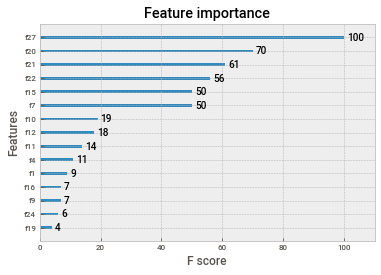

In [ ]:
xgb.plot_importance(bst)

# Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
rfc =RandomForestClassifier(n_estimators=100)
from sklearn.model_selection import GridSearchCV,StratifiedKFold
param_grid = { 
    'n_estimators': [200, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator= rfc, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='accuracy', 
                          verbose=2).fit(X_train, y_train)
CV_rfc.best_params_

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.2min finished


{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 100}

In [47]:
rfc = RandomForestClassifier(**CV_rfc.best_params_)
rfc.fit(X_train,y_train)
t = time()
accuracy = accuracy_score(y_test, rfc.predict(X_test)) 
print("The accuracy of testing data: ",accuracy)
print("The running time: ",time()-t)
print('\n')
print('Classification Report :-')
print(classification_report(y_test,rfc.predict(X_test)))

The accuracy of testing data:  0.9468085106382979
The running time:  0.010782957077026367


Classification Report :-
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       123
           1       0.92      0.92      0.92        65

    accuracy                           0.95       188
   macro avg       0.94      0.94      0.94       188
weighted avg       0.95      0.95      0.95       188



 Adaboost Classifier

In [56]:
from sklearn.ensemble import AdaBoostClassifier
adc = AdaBoostClassifier()
t = time()
adc.fit(X_train,y_train)
accuracy = accuracy_score(y_test, adc.predict(X_test)) 
print("The accuracy of testing data: ",accuracy)
print("The running time: ",time()-t)
print('\n')
print('Classification Report :-')
print(classification_report(y_test,adc.predict(X_test)))

The accuracy of testing data:  0.9521276595744681
The running time:  0.14768576622009277


Classification Report :-
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       123
           1       0.94      0.92      0.93        65

    accuracy                           0.95       188
   macro avg       0.95      0.95      0.95       188
weighted avg       0.95      0.95      0.95       188



Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
t = time()
cart.fit(X_train,y_train)
accuracy = accuracy_score(y_test, cart.predict(X_test)) 
print("The accuracy of testing data: ",accuracy)
print("The running time: ",time()-t)
print('\n')
print('Classification Report :-')
print(classification_report(y_test,cart.predict(X_test)))

The accuracy of testing data:  0.9414893617021277
The running time:  0.010379552841186523


Classification Report :-
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       123
           1       0.95      0.88      0.91        65

    accuracy                           0.94       188
   macro avg       0.94      0.93      0.93       188
weighted avg       0.94      0.94      0.94       188



# Stacking

In [50]:
from sklearn.ensemble import VotingClassifier
t = time()
vc = VotingClassifier([('logreg',logreg),('svm',svm),('rf',rfc)])
vc.fit(X_train,y_train)
accuracy = accuracy_score(y_test, vc.predict(X_test)) 
print("The accuracy of testing data: ",accuracy)
print("The running time: ",time()-t)
print('\n')
print('Classification Report :-')
print(classification_report(y_test,vc.predict(X_test)))

The accuracy of testing data:  0.973404255319149
The running time:  0.30020904541015625


Classification Report :-
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       123
           1       0.97      0.95      0.96        65

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188

